In [1]:
import matplotlib.pyplot as plt
import os
import pydicom

In [2]:
pasta_raiz_do_raiox = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-35511/'
nome_do_arquivo_do_raiox = '1-1.dcm' #Arquivo especifico para o raio x da pasta LIDC-IDRI-0001

<b>def encontrar_arquivo_dicom(pasta, nome_do_arquivo)</b>

Procura um arquivo DICOM com um nome específico dentro de uma pasta e suas subpastas.

<p>- param @ pasta (str): O caminho da pasta raiz onde a busca deve começar.
<p>- param @ nome_do_arquivo (str): O nome do arquivo DICOM a ser encontrado.

Return: objeto pydicom.dataset.FileDataset se o arquivo for encontrado, caso contrário, retorna None.

In [3]:
def encontrar_arquivo_dicom(pasta, nome_do_arquivo):
    for pasta_atual, subpastas, arquivos in os.walk(pasta):
        for arquivo in arquivos:
            if arquivo == nome_do_arquivo:
                caminho_completo = os.path.join(pasta_atual, arquivo)
                ds = pydicom.dcmread(caminho_completo)
                return ds
    return None

Encontrando o Raio X na pasta:

In [4]:
imagem_dicom_raiox = encontrar_arquivo_dicom(pasta_raiz_do_raiox, nome_do_arquivo_do_raiox)

if imagem_dicom_raiox:
    print(imagem_dicom_raiox) #Printa o cabeçalho DICOM da imagem de raiox
    print("Arquivo DICOM de Raio X encontrado e carregado.")
else:
    print("Arquivo DICOM de Raio X não encontrado.")
    

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID        

Printando a imagem de Raio X <i>(sintaxe retirada da documentação).</i>

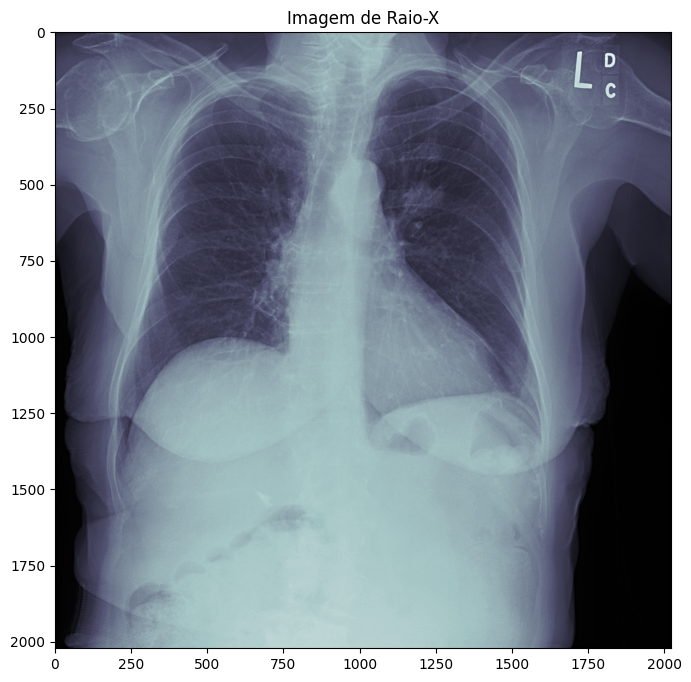

In [5]:
pixel_array = imagem_dicom_raiox.pixel_array

plt.figure(figsize=(8, 8))
plt.imshow(pixel_array, cmap=plt.cm.bone)
plt.title("Imagem de Raio-X")
plt.show()

Printando informações retiradas do cabeçalho DICOM:

In [6]:
instance_number = imagem_dicom_raiox.InstanceNumber
print("Instance Number:", instance_number)

patient_name = imagem_dicom_raiox.PatientName
print("\nPatient's Name:", patient_name)

pixel_array = imagem_dicom_raiox.pixel_array
print("\nPixel Array", pixel_array)

series_number = imagem_dicom_raiox.SeriesNumber
print("\nSeries Number:", series_number)

Instance Number: 1

Patient's Name: 

Pixel Array [[2203 2199 2263 ... 1446 1436 1404]
 [2300 2300 2367 ... 1597 1542 1477]
 [2322 2410 2383 ... 1641 1608 1537]
 ...
 [ 414  434  457 ...  313  322  301]
 [ 430  429  449 ...  306  322  298]
 [ 472  449  427 ...  327  311  307]]

Series Number: 3000923
